# Introduction

In this notebook, we explore neural network models for image classification using Tensorflow and Keras, along with some other important python libraries.

# Part 1: Load data

Let's load some useful Python libraries:
1. numpy: structural data types
2. pandas: data loading and manipulation
3. matplotlib, sns: data visualization
4. sklearn: data analytics algorithms
5. Tensorflow: Deep Learning library
6. Keras: Wrapper for Tensorflow

In [2]:
import time
import matplotlib.pyplot as plt
import numpy as np
import keras
import math

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras import backend as K

from keras.datasets import cifar10
from keras import optimizers
from keras import callbacks
from keras.callbacks import LearningRateScheduler


print("done all imrpots")

done all imrpots


In [ ]:
##MLP-1. Original Control MLP.

starting MLP
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_113 (Dense)            (None, 512)               1573376   
_________________________________________________________________
activation_117 (Activation)  (None, 512)               0         
_________________________________________________________________
dropout_78 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_114 (Dense)            (None, 256)               131328    
_________________________________________________________________
activation_118 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_79 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_115 (Dense)            (None, 10)                2570    

50000/50000 [==============================] - 7s 144us/step - loss: 1.2073 - acc: 0.5658 - val_loss: 1.3110 - val_acc: 0.5346
lr: 0.00625
Epoch 47/100
50000/50000 [==============================] - 7s 144us/step - loss: 1.1998 - acc: 0.5676 - val_loss: 1.3167 - val_acc: 0.5380
lr: 0.00625
Epoch 48/100
50000/50000 [==============================] - 7s 144us/step - loss: 1.1939 - acc: 0.5711 - val_loss: 1.3103 - val_acc: 0.5329
lr: 0.00625
Epoch 49/100
50000/50000 [==============================] - 8s 161us/step - loss: 1.1871 - acc: 0.5726 - val_loss: 1.3358 - val_acc: 0.5281
lr: 0.00625
Epoch 50/100
50000/50000 [==============================] - 9s 177us/step - loss: 1.1817 - acc: 0.5724 - val_loss: 1.3283 - val_acc: 0.5338
lr: 0.003125
Epoch 51/100
50000/50000 [==============================] - 9s 177us/step - loss: 1.1756 - acc: 0.5759 - val_loss: 1.3473 - val_acc: 0.5247
lr: 0.003125
Epoch 52/100
50000/50000 [==============================] - 8s 168us/step - loss: 1.1737 - acc: 0.5

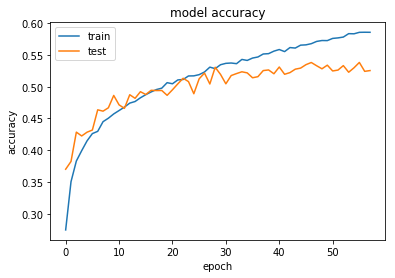

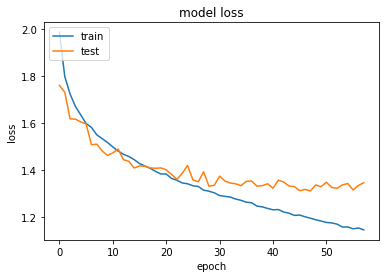

In [43]:
from keras import regularizers
import math

epochs = 100
batch_size = 128
nb_classes = 10


(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.reshape(50000, 32 * 32 * 3)
X_test = X_test.reshape(10000, 32 * 32 * 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

print("starting MLP")

# MLP
model = Sequential()

model.add(Dense(512, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

#Callbacks
# define step decay function
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(step_decay(len(self.losses)))
        print('lr:', step_decay(len(self.losses)))

# learning schedule callback
loss_history = LossHistory()
earlyStopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')
callbacks_list = [loss_history, earlyStopping]

#sgd = optimizers.SGD(lr=0.1, momentum=momentum, decay=0.0, nesterov=False) 
#sgd = optimizers.SGD(lr=lrate, momentum=momentum, decay=decay_rate, nesterov=True)

sgd = optimizers.SGD(lr=0.1, momentum=momentum, decay=0.0, nesterov=False) 


model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()
    
# training
history = model.fit(X_train, Y_train,
                    callbacks=[loss_history, earlyStopping],
                    epochs=epochs, 
                    batch_size=batch_size,
                    verbose=1,
                    validation_data=(X_test, Y_test))

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
##MLP-2. Change in Layer Depth.

starting MLP
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
activation_22 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               524800    
_________________________________________________________________
activation_23 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                5130    

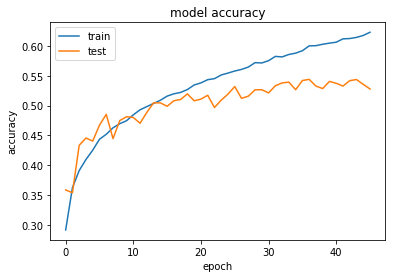

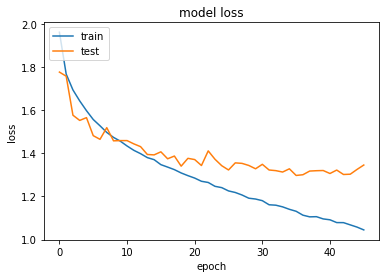

In [11]:
from keras import regularizers
import math

epochs = 100
batch_size = 128
nb_classes = 10
momentum = 0.5

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.reshape(50000, 32 * 32 * 3)
X_test = X_test.reshape(10000, 32 * 32 * 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

print("starting MLP")

# MLP
model = Sequential()

model.add(Dense(1024, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

#Callbacks
# define step decay function
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(step_decay(len(self.losses)))
        print('lr:', step_decay(len(self.losses)))

# learning schedule callback
loss_history = LossHistory()
earlyStopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')
callbacks_list = [loss_history, earlyStopping]

sgd = optimizers.SGD(lr=0.1, momentum=momentum, decay=0.0, nesterov=False) 
#sgd = optimizers.SGD(lr=lrate, momentum=momentum, decay=decay_rate, nesterov=True)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()
    
# training
history = model.fit(X_train, Y_train,
                    callbacks=[loss_history, earlyStopping],
                    epochs=epochs, 
                    batch_size=batch_size,
                    verbose=1,
                    validation_data=(X_test, Y_test))

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##MLP-3. Step learning Rate.

starting MLP
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
activation_55 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_56 (Dense)             (None, 512)               524800    
_________________________________________________________________
activation_56 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 10)                5130    

lr: 0.00625
Epoch 46/100
50000/50000 [==============================] - 13s 265us/step - loss: 0.9916 - acc: 0.6449 - val_loss: 1.2247 - val_acc: 0.5660
lr: 0.00625
Epoch 47/100
50000/50000 [==============================] - 13s 269us/step - loss: 0.9907 - acc: 0.6444 - val_loss: 1.2191 - val_acc: 0.5680
lr: 0.00625
Epoch 48/100
50000/50000 [==============================] - 13s 269us/step - loss: 0.9874 - acc: 0.6459 - val_loss: 1.2216 - val_acc: 0.5657
lr: 0.00625
Epoch 49/100
50000/50000 [==============================] - 14s 276us/step - loss: 0.9877 - acc: 0.6463 - val_loss: 1.2222 - val_acc: 0.5687
lr: 0.00625
Epoch 50/100
50000/50000 [==============================] - 14s 277us/step - loss: 0.9867 - acc: 0.6471 - val_loss: 1.2171 - val_acc: 0.5673
lr: 0.003125
Epoch 51/100
50000/50000 [==============================] - 14s 277us/step - loss: 0.9727 - acc: 0.6533 - val_loss: 1.2139 - val_acc: 0.5687
lr: 0.003125
Epoch 52/100
50000/50000 [==============================] - 14s 276u

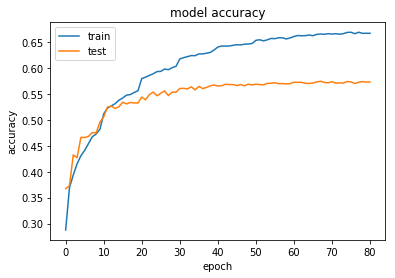

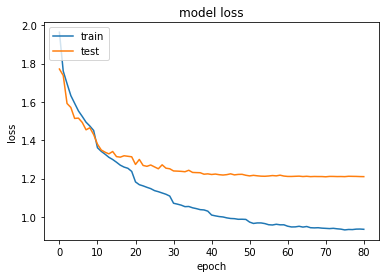

In [31]:
from keras import regularizers
import math

epochs = 100
batch_size = 128
nb_classes = 10
momentum = 0.5

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.reshape(50000, 32 * 32 * 3)
X_test = X_test.reshape(10000, 32 * 32 * 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

print("starting MLP")

# MLP
model = Sequential()

#model.add(Dense(1024, input_shape=X_train.shape[1:], kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1024, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#model.add(Dense(512, kernel_regularizer=regularizers.l2(0.01)) )
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

#Callbacks
# define step decay function
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(step_decay(len(self.losses)))
        print('lr:', step_decay(len(self.losses)))

def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((epoch)/epochs_drop))
    return lrate

# learning schedule callback
loss_history = LossHistory()
lrate = LearningRateScheduler(step_decay)
earlyStopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')
callbacks_list = [loss_history, lrate, earlyStopping]

sgd = optimizers.SGD(lr=0.0, momentum=momentum, decay=0.0, nesterov=False) 
#sgd = optimizers.SGD(lr=lrate, momentum=momentum, decay=decay_rate, nesterov=True)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()
    
# training
history = model.fit(X_train, Y_train,
                    callbacks=[loss_history, lrate, earlyStopping],
                    epochs=epochs, 
                    batch_size=batch_size,
                    verbose=1,
                    validation_data=(X_test, Y_test))

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
##MLP-4. L2 Regularization

starting MLP
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
activation_61 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_62 (Dense)             (None, 512)               524800    
_________________________________________________________________
activation_62 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 10)                5130    

lr: 0.00625
Epoch 46/100
50000/50000 [==============================] - 22s 432us/step - loss: 1.6359 - acc: 0.4697 - val_loss: 1.5933 - val_acc: 0.4916
lr: 0.00625
Epoch 47/100
50000/50000 [==============================] - 24s 480us/step - loss: 1.6339 - acc: 0.4711 - val_loss: 1.6097 - val_acc: 0.4819
lr: 0.00625
Epoch 48/100
50000/50000 [==============================] - 24s 477us/step - loss: 1.6342 - acc: 0.4709 - val_loss: 1.6198 - val_acc: 0.4854
lr: 0.00625
Epoch 49/100
50000/50000 [==============================] - 22s 443us/step - loss: 1.6307 - acc: 0.4718 - val_loss: 1.6239 - val_acc: 0.4736
lr: 0.00625
Epoch 50/100
50000/50000 [==============================] - 22s 443us/step - loss: 1.6280 - acc: 0.4732 - val_loss: 1.6154 - val_acc: 0.4844
lr: 0.003125
Epoch 51/100
50000/50000 [==============================] - 22s 444us/step - loss: 1.6041 - acc: 0.4825 - val_loss: 1.5843 - val_acc: 0.4926
lr: 0.003125
Epoch 52/100
50000/50000 [==============================] - 22s 444u

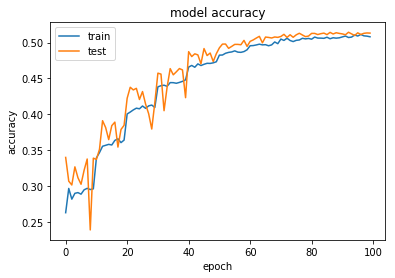

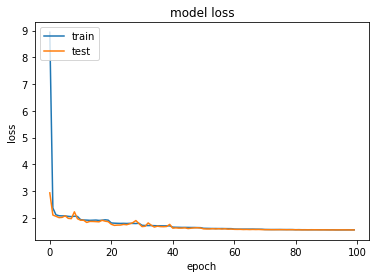

In [33]:
from keras import regularizers
import math

epochs = 100
batch_size = 128
nb_classes = 10
momentum = 0.5

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.reshape(50000, 32 * 32 * 3)
X_test = X_test.reshape(10000, 32 * 32 * 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

print("starting MLP")

# MLP
model = Sequential()

model.add(Dense(1024, input_shape=X_train.shape[1:], kernel_regularizer=regularizers.l2(0.01)))
#model.add(Dense(1024, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512, kernel_regularizer=regularizers.l2(0.01)) )
#model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

#Callbacks
# define step decay function
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(step_decay(len(self.losses)))
        print('lr:', step_decay(len(self.losses)))

def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((epoch)/epochs_drop))
    return lrate

# learning schedule callback
loss_history = LossHistory()
lrate = LearningRateScheduler(step_decay)
earlyStopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')
callbacks_list = [loss_history, lrate, earlyStopping]

sgd = optimizers.SGD(lr=0.0, momentum=momentum, decay=0.0, nesterov=False) 
#sgd = optimizers.SGD(lr=lrate, momentum=momentum, decay=decay_rate, nesterov=True)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()
    
# training
history = model.fit(X_train, Y_train,
                    callbacks=[loss_history, lrate, earlyStopping],
                    epochs=epochs, 
                    batch_size=batch_size,
                    verbose=1,
                    validation_data=(X_test, Y_test))

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
##MLP-4.5 (NOT USED IN REPORT). Changed Nesterov to True.

starting MLP
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
activation_1 (Activation)    (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130    

lr: 0.00625
Epoch 46/100
50000/50000 [==============================] - 15s 308us/step - loss: 1.0031 - acc: 0.6391 - val_loss: 1.2250 - val_acc: 0.5675
lr: 0.00625
Epoch 47/100
50000/50000 [==============================] - 16s 312us/step - loss: 1.0011 - acc: 0.6458 - val_loss: 1.2270 - val_acc: 0.5609
lr: 0.00625
Epoch 48/100
50000/50000 [==============================] - 16s 314us/step - loss: 1.0008 - acc: 0.6431 - val_loss: 1.2269 - val_acc: 0.5637
lr: 0.00625
Epoch 49/100
50000/50000 [==============================] - 16s 312us/step - loss: 0.9961 - acc: 0.6435 - val_loss: 1.2264 - val_acc: 0.5580
lr: 0.00625
Epoch 50/100
50000/50000 [==============================] - 16s 310us/step - loss: 0.9961 - acc: 0.6443 - val_loss: 1.2235 - val_acc: 0.5655
lr: 0.003125
Epoch 51/100
50000/50000 [==============================] - 16s 313us/step - loss: 0.9824 - acc: 0.6498 - val_loss: 1.2193 - val_acc: 0.5669
lr: 0.003125
Epoch 52/100
50000/50000 [==============================] - 16s 313u

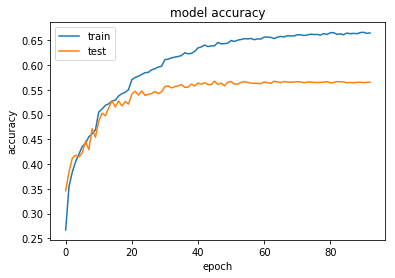

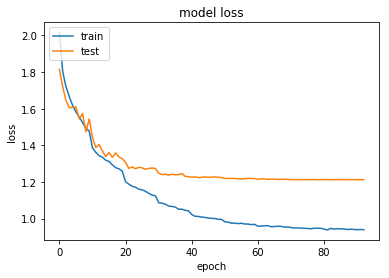

In [3]:
from keras import regularizers
import math

epochs = 100
batch_size = 128
nb_classes = 10
momentum = 0.5

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.reshape(50000, 32 * 32 * 3)
X_test = X_test.reshape(10000, 32 * 32 * 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

print("starting MLP")

# MLP
model = Sequential()

#model.add(Dense(1024, input_shape=X_train.shape[1:], kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1024, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#model.add(Dense(512, kernel_regularizer=regularizers.l2(0.01)) )
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

#Callbacks
# define step decay function
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(step_decay(len(self.losses)))
        print('lr:', step_decay(len(self.losses)))

def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((epoch)/epochs_drop))
    return lrate

# learning schedule callback
loss_history = LossHistory()
lrate = LearningRateScheduler(step_decay)
earlyStopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')
callbacks_list = [loss_history, lrate, earlyStopping]

sgd = optimizers.SGD(lr=0.0, momentum=momentum, decay=0.0, nesterov=True) 
#sgd = optimizers.SGD(lr=lrate, momentum=momentum, decay=decay_rate, nesterov=True)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()
    
# training
history = model.fit(X_train, Y_train,
                    callbacks=[loss_history, lrate, earlyStopping],
                    epochs=epochs, 
                    batch_size=batch_size,
                    verbose=1,
                    validation_data=(X_test, Y_test))

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
##MLP-5. Changed activation function for hidden layer.

starting MLP
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
activation_4 (Activation)    (None, 1024)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130    

lr: 0.00625
Epoch 46/100
50000/50000 [==============================] - 14s 271us/step - loss: 1.2030 - acc: 0.5708 - val_loss: 1.2906 - val_acc: 0.5426
lr: 0.00625
Epoch 47/100
50000/50000 [==============================] - 13s 253us/step - loss: 1.2040 - acc: 0.5707 - val_loss: 1.2822 - val_acc: 0.5450
lr: 0.00625
Epoch 48/100
50000/50000 [==============================] - 13s 267us/step - loss: 1.2032 - acc: 0.5715 - val_loss: 1.2806 - val_acc: 0.5448
lr: 0.00625
Epoch 49/100
50000/50000 [==============================] - 12s 250us/step - loss: 1.2031 - acc: 0.5721 - val_loss: 1.2848 - val_acc: 0.5404
lr: 0.00625
Epoch 50/100
50000/50000 [==============================] - 12s 243us/step - loss: 1.1979 - acc: 0.5715 - val_loss: 1.2874 - val_acc: 0.5470
lr: 0.003125
Epoch 51/100
50000/50000 [==============================] - 12s 235us/step - loss: 1.1842 - acc: 0.5777 - val_loss: 1.2761 - val_acc: 0.5448
lr: 0.003125
Epoch 52/100
50000/50000 [==============================] - 13s 251u

50000/50000 [==============================] - 12s 243us/step - loss: 1.1485 - acc: 0.5947 - val_loss: 1.2688 - val_acc: 0.5498
lr: 0.0001953125
Epoch 99/100
50000/50000 [==============================] - 12s 247us/step - loss: 1.1489 - acc: 0.5914 - val_loss: 1.2689 - val_acc: 0.5515
lr: 0.0001953125
Epoch 100/100
50000/50000 [==============================] - 12s 250us/step - loss: 1.1502 - acc: 0.5913 - val_loss: 1.2688 - val_acc: 0.5508
lr: 9.765625e-05
Test loss: 1.2688479509353638
Test acc: 0.5508


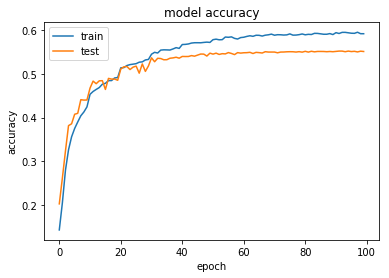

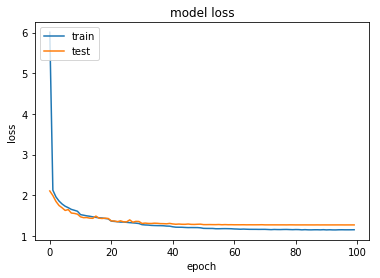

In [4]:
from keras import regularizers
import math

epochs = 100
batch_size = 128
nb_classes = 10
momentum = 0.5

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.reshape(50000, 32 * 32 * 3)
X_test = X_test.reshape(10000, 32 * 32 * 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

print("starting MLP")

# MLP
model = Sequential()

#model.add(Dense(1024, input_shape=X_train.shape[1:], kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1024, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#model.add(Dense(512, kernel_regularizer=regularizers.l2(0.01)) )
model.add(Dense(512))
model.add(Activation('tanh'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

#Callbacks
# define step decay function
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(step_decay(len(self.losses)))
        print('lr:', step_decay(len(self.losses)))

def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((epoch)/epochs_drop))
    return lrate

# learning schedule callback
loss_history = LossHistory()
lrate = LearningRateScheduler(step_decay)
earlyStopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')
callbacks_list = [loss_history, lrate, earlyStopping]

sgd = optimizers.SGD(lr=0.0, momentum=momentum, decay=0.0, nesterov=False) 
#sgd = optimizers.SGD(lr=lrate, momentum=momentum, decay=decay_rate, nesterov=True)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()
    
# training
history = model.fit(X_train, Y_train,
                    callbacks=[loss_history, lrate, earlyStopping],
                    epochs=epochs, 
                    batch_size=batch_size,
                    verbose=1,
                    validation_data=(X_test, Y_test))

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
##MLP-6. Changing Optimizer to RMSProp from SGD.

starting MLP
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
activation_88 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_59 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_89 (Dense)             (None, 512)               524800    
_________________________________________________________________
activation_89 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_60 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_90 (Dense)             (None, 10)                5130    

lr: 0.00625
Epoch 46/100
50000/50000 [==============================] - 22s 444us/step - loss: 1.4076 - acc: 0.5034 - val_loss: 1.4841 - val_acc: 0.4845
lr: 0.00625
Epoch 47/100
50000/50000 [==============================] - 22s 442us/step - loss: 1.4028 - acc: 0.5060 - val_loss: 1.4463 - val_acc: 0.4929
lr: 0.00625
Epoch 48/100
50000/50000 [==============================] - 22s 440us/step - loss: 1.3981 - acc: 0.5063 - val_loss: 1.4647 - val_acc: 0.4945
lr: 0.00625
Epoch 49/100
50000/50000 [==============================] - 22s 440us/step - loss: 1.4034 - acc: 0.5044 - val_loss: 1.4665 - val_acc: 0.4903
lr: 0.00625
Epoch 50/100
50000/50000 [==============================] - 22s 441us/step - loss: 1.4014 - acc: 0.5053 - val_loss: 1.5069 - val_acc: 0.4708
lr: 0.003125
Epoch 51/100
50000/50000 [==============================] - 22s 442us/step - loss: 1.4036 - acc: 0.5057 - val_loss: 1.5027 - val_acc: 0.4761
lr: 0.003125
Epoch 52/100
50000/50000 [==============================] - 22s 438u

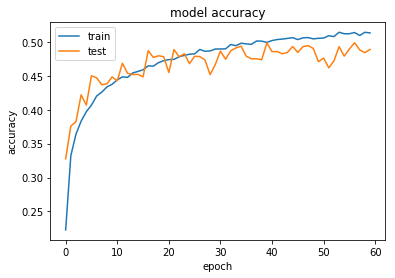

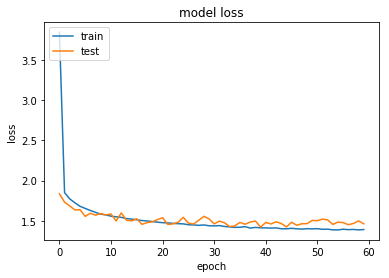

In [33]:
from keras import regularizers
import math

epochs = 100
batch_size = 128
nb_classes = 10
momentum = 0.5

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.reshape(50000, 32 * 32 * 3)
X_test = X_test.reshape(10000, 32 * 32 * 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

print("starting MLP")

# MLP
model = Sequential()

#model.add(Dense(1024, input_shape=X_train.shape[1:], kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1024, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#model.add(Dense(512, kernel_regularizer=regularizers.l2(0.01)) )
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

#Callbacks
# define step decay function
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(step_decay(len(self.losses)))
        print('lr:', step_decay(len(self.losses)))


# learning schedule callback
loss_history = LossHistory()
earlyStopping = callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=0, mode='auto')


#sgd = optimizers.SGD(lr=0.0, momentum=momentum, decay=0.0, nesterov=True) 
#sgd = optimizers.SGD(lr=lrate, momentum=momentum, decay=decay_rate, nesterov=True)
#adagrad = keras.optimizers.Adagrad(lr=0.01, epsilon=1e-08, decay=0.0)

#model.compile(loss='categorical_crossentropy', optimizer=adagrad, metrics=['accuracy'])
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
model.summary()
    
# training
history = model.fit(X_train, Y_train,
                    callbacks=[loss_history, earlyStopping],
                    epochs=epochs, 
                    batch_size=batch_size,
                    verbose=1,
                    validation_data=(X_test, Y_test))

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
##MLP-6.5. NOT COVERED IN REPORT. Increasing to 3 hidden layers with small layer sizes.

starting MLP
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
activation_91 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_61 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_92 (Dense)             (None, 512)               524800    
_________________________________________________________________
activation_92 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_62 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_93 (Dense)             (None, 512)               262656  

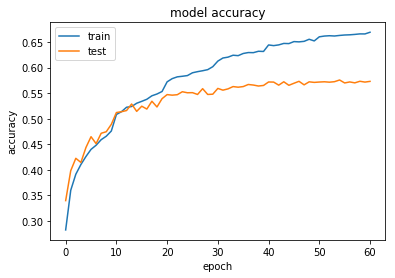

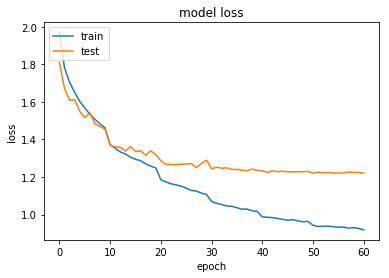

In [34]:
from keras import regularizers
import math

epochs = 100
batch_size = 128
nb_classes = 10
momentum = 0.5

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.reshape(50000, 32 * 32 * 3)
X_test = X_test.reshape(10000, 32 * 32 * 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

print("starting MLP")

# MLP
model = Sequential()

#model.add(Dense(1024, input_shape=X_train.shape[1:], kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1024, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#model.add(Dense(512, kernel_regularizer=regularizers.l2(0.01)) )
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#model.add(Dense(512, kernel_regularizer=regularizers.l2(0.01)) )
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

#Callbacks
# define step decay function
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(step_decay(len(self.losses)))
        print('lr:', step_decay(len(self.losses)))

def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((epoch)/epochs_drop))
    return lrate

# learning schedule callback
loss_history = LossHistory()
lrate = LearningRateScheduler(step_decay)
earlyStopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')
callbacks_list = [loss_history, lrate, earlyStopping]

sgd = optimizers.SGD(lr=0.0, momentum=momentum, decay=0.0, nesterov=False) 
#sgd = optimizers.SGD(lr=lrate, momentum=momentum, decay=decay_rate, nesterov=True)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()
    
# training
history = model.fit(X_train, Y_train,
                    callbacks=[loss_history, lrate, earlyStopping],
                    epochs=epochs, 
                    batch_size=batch_size,
                    verbose=1,
                    validation_data=(X_test, Y_test))

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
##MLP-7. Increasing to 3 hidden layers.

starting MLP
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_95 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
activation_95 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_64 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_96 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
activation_96 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_65 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_97 (Dense)             (None, 512)               524800  

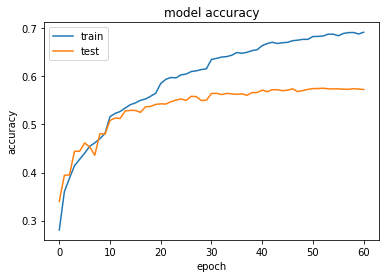

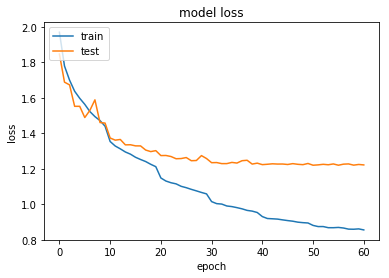

In [35]:
from keras import regularizers
import math

epochs = 100
batch_size = 128
nb_classes = 10
momentum = 0.5

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.reshape(50000, 32 * 32 * 3)
X_test = X_test.reshape(10000, 32 * 32 * 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

print("starting MLP")

# MLP
model = Sequential()

#model.add(Dense(1024, input_shape=X_train.shape[1:], kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1024, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#model.add(Dense(512, kernel_regularizer=regularizers.l2(0.01)) )
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#model.add(Dense(512, kernel_regularizer=regularizers.l2(0.01)) )
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

#Callbacks
# define step decay function
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(step_decay(len(self.losses)))
        print('lr:', step_decay(len(self.losses)))

def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((epoch)/epochs_drop))
    return lrate

# learning schedule callback
loss_history = LossHistory()
lrate = LearningRateScheduler(step_decay)
earlyStopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')
callbacks_list = [loss_history, lrate, earlyStopping]

sgd = optimizers.SGD(lr=0.0, momentum=momentum, decay=0.0, nesterov=False) 
#sgd = optimizers.SGD(lr=lrate, momentum=momentum, decay=decay_rate, nesterov=True)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()
    
# training
history = model.fit(X_train, Y_train,
                    callbacks=[loss_history, lrate, earlyStopping],
                    epochs=epochs, 
                    batch_size=batch_size,
                    verbose=1,
                    validation_data=(X_test, Y_test))

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
##MLP-9. Reducing Batch Size.

starting MLP
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
activation_7 (Activation)    (None, 1024)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_8 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130    

50000/50000 [==============================] - 40s 804us/step - loss: 1.2450 - acc: 0.5509 - val_loss: 1.3389 - val_acc: 0.5223
lr: 0.00625
Epoch 47/100
50000/50000 [==============================] - 44s 878us/step - loss: 1.2463 - acc: 0.5509 - val_loss: 1.3350 - val_acc: 0.5217
lr: 0.00625
Epoch 48/100
50000/50000 [==============================] - 42s 839us/step - loss: 1.2396 - acc: 0.5560 - val_loss: 1.3343 - val_acc: 0.5226
lr: 0.00625
Epoch 49/100
50000/50000 [==============================] - 44s 876us/step - loss: 1.2345 - acc: 0.5570 - val_loss: 1.3319 - val_acc: 0.5216
lr: 0.00625
Epoch 50/100
50000/50000 [==============================] - 40s 808us/step - loss: 1.2366 - acc: 0.5552 - val_loss: 1.3347 - val_acc: 0.5179
lr: 0.003125
Epoch 51/100
50000/50000 [==============================] - 41s 812us/step - loss: 1.2118 - acc: 0.5629 - val_loss: 1.3236 - val_acc: 0.5265
lr: 0.003125
Epoch 52/100
50000/50000 [==============================] - 42s 846us/step - loss: 1.2086 - a

lr: 0.0001953125
Epoch 99/100
50000/50000 [==============================] - 48s 963us/step - loss: 1.1482 - acc: 0.5886 - val_loss: 1.2986 - val_acc: 0.5404
lr: 0.0001953125
Epoch 100/100
50000/50000 [==============================] - 50s 1ms/step - loss: 1.1486 - acc: 0.5874 - val_loss: 1.2976 - val_acc: 0.5402
lr: 9.765625e-05
Test loss: 1.2976296857833862
Test acc: 0.5402


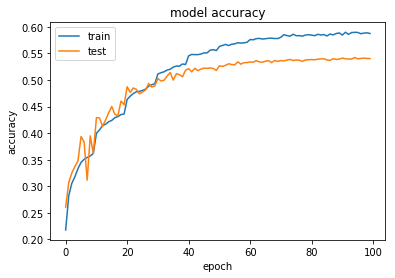

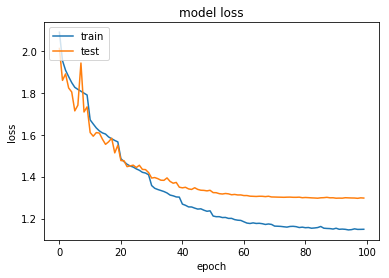

In [5]:
from keras import regularizers
import math

epochs = 100
batch_size = 32
nb_classes = 10
momentum = 0.5

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.reshape(50000, 32 * 32 * 3)
X_test = X_test.reshape(10000, 32 * 32 * 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

print("starting MLP")

# MLP
model = Sequential()

#model.add(Dense(1024, input_shape=X_train.shape[1:], kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1024, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#model.add(Dense(512, kernel_regularizer=regularizers.l2(0.01)) )
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

#Callbacks
# define step decay function
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(step_decay(len(self.losses)))
        print('lr:', step_decay(len(self.losses)))

def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((epoch)/epochs_drop))
    return lrate

# learning schedule callback
loss_history = LossHistory()
lrate = LearningRateScheduler(step_decay)
earlyStopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')
callbacks_list = [loss_history, lrate, earlyStopping]

sgd = optimizers.SGD(lr=0.0, momentum=momentum, decay=0.0, nesterov=False) 
#sgd = optimizers.SGD(lr=lrate, momentum=momentum, decay=decay_rate, nesterov=True)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()
    
# training
history = model.fit(X_train, Y_train,
                    callbacks=[loss_history, lrate, earlyStopping],
                    epochs=epochs, 
                    batch_size=batch_size,
                    verbose=1,
                    validation_data=(X_test, Y_test))

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## CNN Architecture

In [ ]:
##CNN -1. Control Setup.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_113 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_114 (Activation)  (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_76 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 7200)              0         
__________

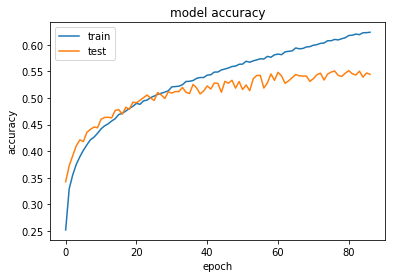

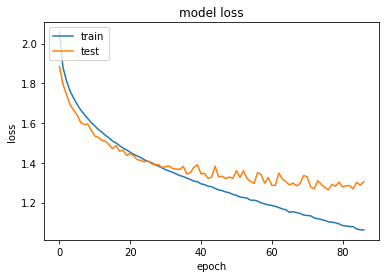

In [41]:
# Retrieving Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Declare variables
nb_epoch = 100
batch_size = 128
nb_classes = 10

# Convert and pre-processing

y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

def base_model():

    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32,(3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))

    sgd = SGD()

# Train model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

cnn_n = base_model()
cnn_n.summary()

# Fit model

cnn = cnn_n.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, validation_data=(x_test,y_test),shuffle=True)
loss, acc = cnn_n.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

In [6]:
##CNN-2. Multi-variable Improvement.

1.2976296857833862


In [48]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Declare variables
nb_epoch = 100
batch_size = 64
nb_classes = 10

# Convert and pre-processing

y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(80))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


sgd = optimizers.SGD(lr=0.01, decay=1e-5, momentum=0.75, nesterov=True)

model.compile(loss='categorical_crossentropy',optimizer= sgd,metrics=['accuracy'])


model.summary()

# Fit model

model.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, validation_data=(x_test,y_test),shuffle=True)
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_135 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_92 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_136 (Activation)  (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 64)          0         
__________

50000/50000 [==============================] - 38s 764us/step - loss: 0.4032 - acc: 0.8545 - val_loss: 0.5842 - val_acc: 0.8013
Epoch 98/100
50000/50000 [==============================] - 40s 797us/step - loss: 0.4088 - acc: 0.8521 - val_loss: 0.5869 - val_acc: 0.8062
Epoch 99/100
50000/50000 [==============================] - 40s 808us/step - loss: 0.4011 - acc: 0.8559 - val_loss: 0.5873 - val_acc: 0.8064
Epoch 100/100
50000/50000 [==============================] - 44s 888us/step - loss: 0.3938 - acc: 0.8580 - val_loss: 0.5965 - val_acc: 0.8050
Test loss: 0.5964818822860718
Test acc: 0.805


You can add your analysis and results using these markdown cells.
Some of the things you can play with for your models include
1. Effects of varying number of hidden layers
2. Effects of varying number of neurons in the hidden layers
3. Effects of different learning rates
4. Effects of other parameters (training method, activation function, loss function etc)

You can also change the metric for classifier performance by using other measures such as mean squared error, confusion matrices etc.

Here are some useful links for learning more about creating NN architectures:
1. Keras - http://keras.io
2. Tensorflow - http://www.tensorflow.org/
3. Python numpy tutorial -  http://cs231n.github.io/python-numpy-tutorial/
